# Image Classification with Convolutional Neural Network (CNN)

This notebook demonstrates how to build and train a CNN model for image classification using a custom dataset. The dataset (Playing Cards) is organized into `train`, `val`, and `test` subfolders, each containing multiple category folders.


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'dataset/train'
val_dir = 'dataset/valid'
test_dir = 'dataset/test'

In [10]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [11]:
# Only rescaling for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
# Loading the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


## Build the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 53)             │        27,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,060,853 (72.71 MB)

 Trainable params: 19,060,853 (72.71 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20


d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


238/238 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.1360 - loss: 3.5336 - val_accuracy: 0.3906 - val_loss: 1.7978
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.3125 - loss: 2.3997 - val_accuracy: 0.3333 - val_loss: 1.7425
Epoch 3/20


d:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


238/238 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.3852 - loss: 2.2217 - val_accuracy: 0.6797 - val_loss: 1.2300
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.3438 - loss: 1.9598 - val_accuracy: 0.6667 - val_loss: 1.6427
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.5073 - loss: 1.7995 - val_accuracy: 0.7383 - val_loss: 0.9817
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.5000 - loss: 1.7757 - val_accuracy: 0.6667 - val_loss: 1.2473
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.5891 - loss: 1.5080 - val_accuracy: 0.7617 - val_loss: 0.8218
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.7500 - loss: 1.0101 - val_accuracy: 0.6667 - val_loss: 2.0947
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.6388 - loss: 1.3208 - val_accuracy: 0.7773 - val_loss: 0.7955
Epoch 10/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.6875 - loss: 1.5206 - val_accuracy: 

## Evaluate the Model

In [15]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.8227 - loss: 0.5360
Test accuracy: 0.8113207817077637


## Make Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: ace of spades


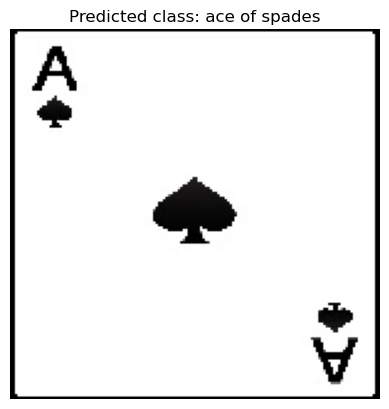

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#image for prediction
img_path = 'dataset/predict/1.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted class: {class_labels[predicted_class]}')

# Display prediction
plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()
